Final Project, Part 1: Proposal
========================
Frame your problem, criteria, and data source(s)

Describe your chosen problem and state whether you have access to relevant data. If you get stuck, see this list of curated datasets.

Requirements
Draft a well-formed problem statement relevant to a business problem affecting your team, division, or organization.
Include the following elements:
Hypothesis/assumptions
Goals and success metrics
Risks or limitations
Identify at least one relevant internal dataset and confirm that you have (or can get) the right access permissions.
Submission
Submit or share your project proposal as per your instructor's directions.


INTRODUCTION:

https://www.lendingclub.com promises returns far in excess of typical bank deposit rates.

The web site gives an analysis on returns versus risk.  Returns are correlated to:

Loan Tenor
Credit worthiness of borrower
Year of loan origination

The site also explains that granularity (diversification of investment) increases the predictability of return / reduces the range of outcomes.

The site finally gives an example of expected returns:

Average Interest Rate              14%
Effect of chargoffs / prepayments  -8%
LendingClub fee                    -1%

                                 => 5%

PROJECT:

Which variables included in the data set provide the best indicators of loan performance (loan status = fully paid or current) other than the ones provided in the website and is there a way to optimise the returns generated?   Examples of variables:

Loan purpose (business / auto / person)
Interest rate (burden on borrower)
Income and its verification status
County

Is the example return a fair indication given the data set (given the example ave IR = 14% vs the data set is 12.99%)?

LIMITATIONS:

The number of loans that have actually defaulted versus the entire data set is small.
There are a lot of columns that have missing data.
The original data set is very big (>500mb).
What would be key indicators of loan performance such as FICO - are not available anymore in the data.
Different years / vintages of loan give radically different outcomes.  Investigate.
There are a lot of categorical variables.

Part 2: Brief
==========    
Exploratory data analysis is a crucial step in any data workflow. Create a Jupyter Notebook that explores your data mathematically and visually. Explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

Requirements

Create an exploratory data analysis notebook.

Done

Perform statistical analysis, along with any visualizations.

As per below

Determine how to handle sampling or missing values.

There is a *lot* of data and a lot of columns
    >  I have removed all the columns with >50% data missing
    >  I have also taken a random sample size of 20% of the data for doing to exploration - runs faster
    >  I have also removed object columns such 'title' or 'URL' that hold no value for the anlaysis

The are 10 types of loan status - we are simply concerned if a loan will repay or not
    >  I categorised 3 of the loan status = GOOD LOAN  (eg fully paid)
    >  I categorised 7 of the loan status = BAD  LOAN
    
With the existing variables in the data set I have done some box plots
    >  Interest rate vs GOOD LOAN / BAD LOAN
    >  Debt to Income ration vs GOOD LOAN / BAD LOAN
    >  Loan size vs GOOD LOAN / BAD LOAN

There are a lot of categorical variables / objects
    >  These will need encoding into 1/0 (yes / no integers) for modeling
    >  I have done this on the loan tenor column but will do on more for the full analysis - eg state
    >  These object columns appear to hold most potential wrt modeling 

Clearly identify shortcomings, assumptions, and next steps.    
    >  In the initial analysis I used all loans - so some loans in arrears might actual end up replaying = GOOD LOAN
       I will seperate loans that have run their course a do a sperate analysis on those

    >  I suspect there with be some multi colinearity between the features - such as interest rate and state...
    >  Interest rate should be a function of the risk of default so look at removing these from the model
       
    >  Next steps will be to select the categorical variables we want to use and change them into integers using
       Ordered (1,2,3 etc) and unordered dummy encoding..
    
    >  Select the variables in the model (feature columns)
    >  Train and fit the model using a sample of data using SK Learn and the 'test train split function'
    >  Test the model and compare to a null baseline
    >  Use MSE and RMSE to evaluate the preformance of the model

In [54]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
loan = pd.read_csv('lending-club-loan-data/loan.csv')


/Users/User/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
pd.set_option('max_columns', 10000)
#so can see all the columns

In [56]:
loan.head()
#lots of NA & categorical data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
loan.shape

(887379, 74)

In [58]:
#Make loan book smaller for initial analysis
loan = loan.sample(frac=0.2, random_state=99)
loan.shape

(177476, 74)

In [59]:
#a lot of NA's
loan.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       10344
emp_length                       9016
home_ownership                      0
annual_inc                          1
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           152261
purpose                             0
title                              29
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         7
earliest_cr_

In [60]:
#remove columns with >50% NA - down to 53 columns
cut = len(loan) * 50 / 100
loan = loan.dropna(thresh=cut, axis=1)
loan.shape

(177476, 53)

In [61]:
#objects like URL EMP TITLE can be removed as will not add to any analysis
loan.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title               77747
emp_length                 11
home_ownership              5
verification_status         3
issue_d                   103
loan_status                10
pymnt_plan                  2
url                    177476
purpose                    14
title                   15918
zip_code                  887
addr_state                 51
earliest_cr_line          642
initial_list_status         2
last_pymnt_d               97
next_pymnt_d               86
last_credit_pull_d         97
application_type            2
dtype: int64

In [62]:
loan = loan.drop(columns=['url', 'emp_title', 'title'])
loan.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           5
verification_status      3
issue_d                103
loan_status             10
pymnt_plan               2
purpose                 14
zip_code               887
addr_state              51
earliest_cr_line       642
initial_list_status      2
last_pymnt_d            97
next_pymnt_d            86
last_credit_pull_d      97
application_type         2
dtype: int64

In [63]:
loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.774760e+05,1.774760e+05,177476.000000,177476.000000,177476.000000,177476,177476.000000,177476.000000,177476,177476,168460,177476,1.774750e+05,177476,177476,177476,177476,177476,177476,177476,177476.000000,177469.000000,177469,177469.000000,177469.000000,177469.000000,1.774760e+05,177392.000000,177469.000000,177476,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,173850,177476.000000,126953,177464,177444.000000,177476.0,177476,177469.000000,163536.000000,1.635360e+05,1.635360e+05
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,11,5,NaN,3,103,10,2,14,887,51,NaN,NaN,642,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,86,97,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,Current,n,debt_consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,123983,NaN,NaN,50857,11217,58365,88721,NaN,66006,9505,120366,177474,104773,1963,25856,NaN,NaN,1313,NaN,NaN,NaN,NaN,NaN,NaN,91108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94386,NaN,110857,145904,NaN,NaN,177379,NaN,NaN,NaN,NaN
mean,3.248782e+07,3.502788e+07,14771.649829,14758.244354,14717.924608,NaN,13.253606,437.050257,NaN,NaN,NaN,NaN,7.510313e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.131340,0.312190,NaN,0.693372,11.527022,0.195392,1.692286e+04,55.119717,25.223921,NaN,8422.901111,8419.508916,7552.439053,7513.903861,5751.598519,1752.998455,0.402781,47.439298,5.133247,NaN,2159.993825,NaN,NaN,0.014314,1.0,NaN,0.005088,221.382619,1.392692e+05,3.206769e+04
std,2.282007e+07,2.410537e+07,8437.091253,8431.146725,8444.407211,NaN,4.377131,244.295782,NaN,NaN,NaN,NaN,6.741903e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.710558,0.853628,NaN,1.001737,5.301526,0.572413,2.239254e+04,23.778618,11.830098,NaN,8498.599006,8495.168771,7853.546880,7828.657899,6620.555973,2081.501199,4.207381,423.517235,67.158545,NaN,4787.730535,NaN,NaN,0.130322,0.0,NaN,0.077080,2195.937546,1.528491e+05,4.035986e+04
min,5.641300e+04,7.299200e+04,500.000000,500.000000,0.000000,NaN,5.320000,15.670000,NaN,NaN,NaN,NaN,1.770000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,1.0,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,9.217709e+06,1.088884e+07,8000.000000,8000.000000,8000.000000,NaN,9.990000,260.850000,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.890000,0.000000,NaN,0.000000,8.000000,0.000000,6.469000e+03,37.700000,17.000000,NaN,0.000000,0.000000,1918.887500,1902.837500,1201.062500,443.892500,0.000000,0.000000,0.000000,NaN,280.407500,NaN,NaN,0.000000,1.0,NaN,0.000000,0.000000,2.980700e+04,1.400000e+04
50%,3.443216e+07,3.708662e+07,13000.000000,13000.000000,13000.000000,NaN,12.990000,382.550000,NaN,NaN,NaN,NaN,6.475200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.640000,0.000000,NaN,0.000000,11.000000,0.000000,1.190300e+04,56.000000,24.000000,NaN,6501.440000,6500.000000,4894.825000,4862.510000,3206.795000,1077.220000,0.000000,0.000000,0.000000,NaN,462.950000,NaN,NaN,0.000000,1.0,NaN,0.000000,0.000000,8.021800e+04,2.380000e+04
75%,5.481816e+07,

In [93]:
loan.info()

#objects appear to hold a lot of the potential correlations:

#grade                         177476 non-null object
#sub_grade                     177476 non-null object
#emp_length                    168460 non-null object
#home_ownership                177476 non-null object
#verification_status           177476 non-null object
#issue_d                       177476 non-null object
#loan_status                   177476 non-null object
#pymnt_plan                    177476 non-null object
#purpose                       177476 non-null object
#zip_code                      177476 non-null object
#addr_state                    177476 non-null object


<class 'pandas.core.frame.DataFrame'>
Int64Index: 177476 entries, 38778 to 570618
Data columns (total 52 columns):
id                            177476 non-null int64
member_id                     177476 non-null int64
loan_amnt                     177476 non-null float64
funded_amnt                   177476 non-null float64
funded_amnt_inv               177476 non-null float64
term                          177476 non-null object
int_rate                      177476 non-null float64
installment                   177476 non-null float64
grade                         177476 non-null object
sub_grade                     177476 non-null object
emp_length                    168460 non-null object
home_ownership                177476 non-null object
annual_inc                    177475 non-null float64
verification_status           177476 non-null object
issue_d                       177476 non-null object
loan_status                   177476 non-null object
pymnt_plan                    177

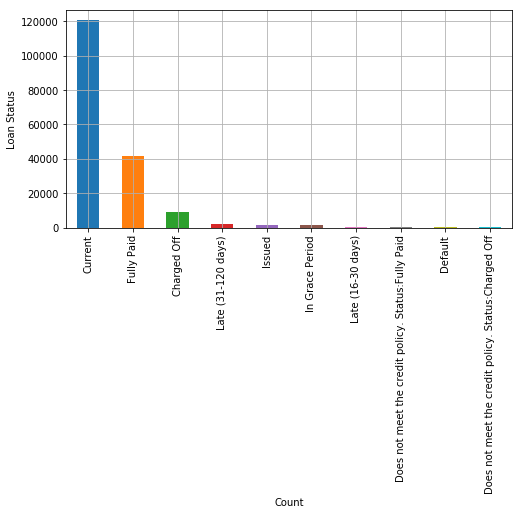

In [64]:
#lets have a look at the status of the various loans
plt.figure(figsize= (8,4))
plt.ylabel('Loan Status')
plt.xlabel('Count')
loan['loan_status'].value_counts().plot(kind = 'bar', grid = True)
plt.show()

In [65]:
#we need to know if a loan will perform or not perform... 
#categorise each loan status into 2 distinct outcomes - GOOD LOAN or BAD LOAN
#I have defined them as per below. 
#A flaw with this is that we are looking at both live loans that might be only 1 week old and old loans in the same basket
#Possibly split the pool into matured / old loans and look at those seperately later

In [80]:
loan['good_loan'] = np.where((loan.loan_status == 'Fully Paid') | (loan.loan_status == 'Current') | (loan.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)
loan['bad_loan']  = np.where((loan.loan_status == 'Charged Off') | (loan.loan_status == 'Default') | (loan.loan_status == 'Late (31-120 days)') | (loan.loan_status == 'In Grace Period') | (loan.loan_status == 'Late (16-30 days)') | (loan.loan_status == 'Does not meet the credit policy. Status:Charged Off') | (loan.loan_status == 'Issued'), 1, 0)                             

In [78]:
# Do some exporatory analysis into if a loan is good or bad based on some variables in the data set
# I kept the good loan as 1 or 0 - not yes or no - so I can do some correlation analysis on it later

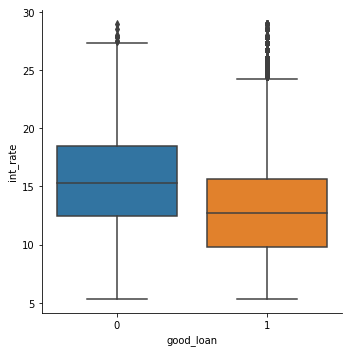

In [69]:
# interest rate charged should be correlated to outcome - and it is

sns.catplot(x="good_loan", y="int_rate", kind="box", data=loan);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24f166a0>]],
      dtype=object)

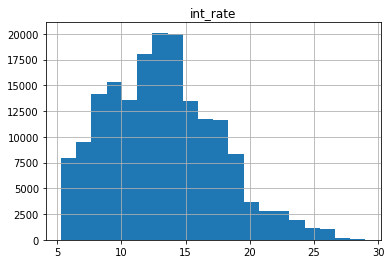

In [70]:
loan.hist(column='int_rate', bins=20)
# histogram as continuous data

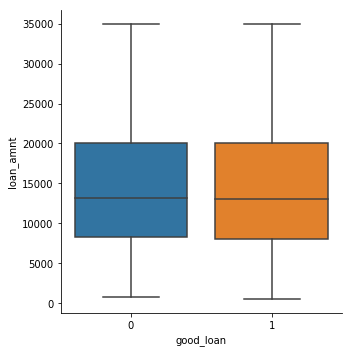

In [72]:
# not correlated to loan size

sns.catplot(x="good_loan", y="loan_amnt", kind="box", data=loan);

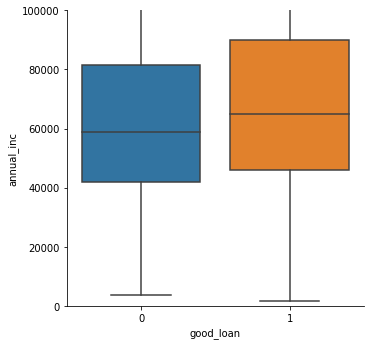

In [73]:
# is correlated to annual income

sns.catplot(x="good_loan", y="annual_inc", kind="box", data=loan).set(ylim=(0, 100000));

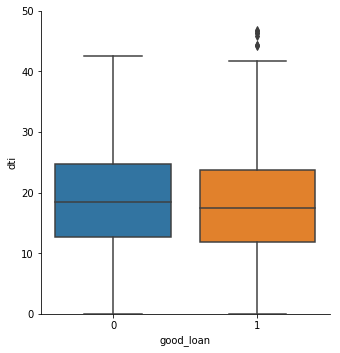

In [74]:
# is correlated to debt to income ratio

sns.catplot(x="good_loan", y="dti", kind="box", data=loan).set(ylim=(0, 50));

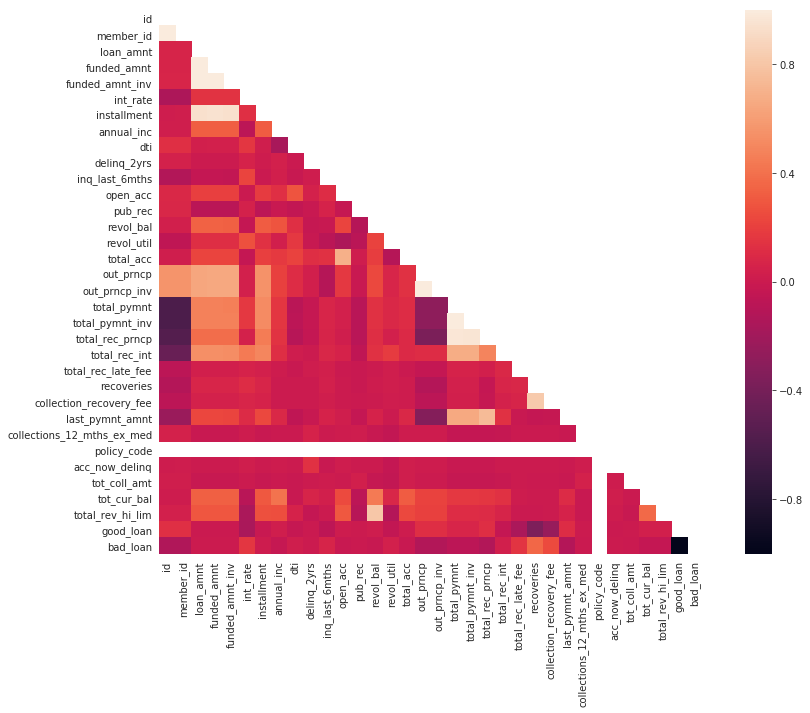

In [82]:
plt.figure(figsize=(15,10))

# Calculate correlation between each pair of variable
corr_matrix=loan.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, mask=mask, square=True)
    
    
#or loan.corr()

In [ ]:
# this correlation matrix really only shows that there is a correlation between good loan / bad loan
# and loans that have already started to default..  fields such as 'recoveries'

In [ ]:
# the correlations that we are looking for will be in the categorical data such as loan term or state:

In [88]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [90]:
loan.addr_state.unique()
#loan.loan_status.unique()
#loan.grade.unique()
#loan.purpose.unique()

array(['TX', 'CA', 'WI', 'UT', 'NC', 'OR', 'PA', 'NY', 'MN', 'SC', 'GA',
       'OK', 'NJ', 'MD', 'IL', 'OH', 'IN', 'MS', 'MA', 'MO', 'VA', 'FL',
       'VT', 'CO', 'MI', 'AZ', 'NH', 'AR', 'KS', 'DE', 'TN', 'RI', 'CT',
       'AL', 'NV', 'WA', 'LA', 'KY', 'WV', 'MT', 'AK', 'WY', 'HI', 'DC',
       'NM', 'ND', 'NE', 'ME', 'SD', 'ID', 'IA'], dtype=object)

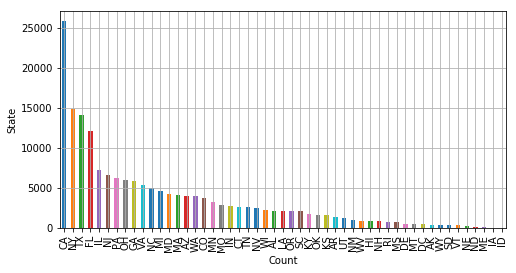

In [83]:
plt.figure(figsize= (8,4))
plt.ylabel('State')
plt.xlabel('Count')
loan['addr_state'].value_counts().plot(kind = 'bar', grid = True)
plt.show()

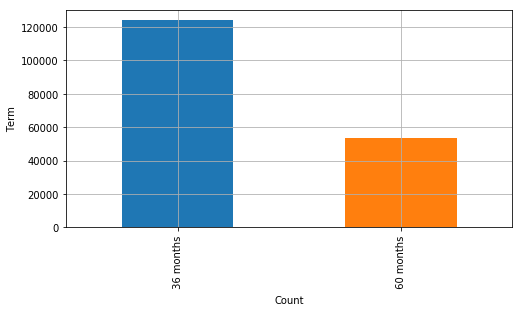

In [85]:
plt.figure(figsize= (8,4))
plt.ylabel('Term')
plt.xlabel('Count')
loan['term'].value_counts().plot(kind = 'bar', grid = True)
plt.show()

In [86]:
term_dummies = pd.get_dummies(loan.term, prefix='term')
#term_dummies.drop(term_dummies.columns[0], axis=1, inplace=True)

loan_dummies = pd.concat([loan, term_dummies], axis=1)
loan_dummies.sample(n=5, random_state=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_loan,bad_loan,term_ 36 months,term_ 60 months
589055,61419086,65537828,16000.0,16000.0,16000.0,60 months,13.33,366.76,C,C3,6 years,RENT,62000.0,Not Verified,Oct-2015,Current,n,car,275xx,NC,38.44,0.0,Oct-1997,0.0,15.0,0.0,1961.0,4.1,20.0,w,15619.85,15619.85,804.61,804.61,380.15,424.46,0.0,0.0,0.0,Jan-2016,366.76,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,50586.0,47500.0,1,0,0,1
335979,22473979,24796655,15000.0,15000.0,15000.0,36 months,10.15,485.07,B,B2,10+ years,RENT,58000.0,Not Verified,Jul-2014,Current,n,debt_consolidation,317xx,GA,27.52,2.0,May-1998,3.0,13.0,0.0,13750.0,38.0,31.0,w,8480.69,8480.69,8246.19,8246.19,6519.31,1726.88,0.0,0.0,0.0,Jan-2016,485.07,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,79605.0,36200.0,1,0,1,0
177843,2574676,3086837,18000.0,18000.0,17925.0,60 months,21.49,491.94,E,E3,< 1 year,RENT,65000.0,Verified,Dec-2012,Current,n,credit_card,088xx,NJ,25.83,1.0,Oct-2003,2.0,13.0,0.0,12767.0,72.1,22.0,f,9530.47,9490.71,17704.66,17631.01,8469.53,9235.13,0.0,0.0,0.0,Dec-2015,491.94,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,49058.0,17700.0,1,0,0,1
515390,65814799,70447575,1000.0,1000.0,1000.0,36 months,8.18,31.42,B,B1,10+ years,MORTGAGE,50000.0,Not Verified,Nov-2015,Current,n,debt_consolidation,891xx,NV,32.45,0.0,Jan-1990,0.0,9.0,0.0,4435.0,27.7,36.0,w,975.40,975.40,31.42,31.42,24.60,6.82,0.0,0.0,0.0,Dec-2015,31.87,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,163711.0,16000.0,1,0,1,0
90948,7094450,8755909,20800.0,20800.0,20800.0,36 months,13.68,707.67,C,C1,2 years,RENT,66500.0,Source Verified,Sep-2013,Current,n,credit_card,021xx,MA,30.26,0.0,Nov-2004,0.0,15.0,0.0,3306.0,32.4,31.0,f,5381.65,5381.65,19814.51,19814.51,15418.35,4396.16,0.0,0.0,0.0,Jan-2016,707.67,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,90146.0,10200.0,1,0,1,0


In [87]:
feature_columns = ['term_ 36 months', 'term_ 60 months']